# Questionário 02
## SME0828 - Introdução à Ciência de Dados

Andressa Colaço, Nº USP 12610389.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ***Questão 01***



Importe os dados do link: https://www.worldometers.info/world-population/population-by-country/
Construa a matriz de correlação. Quais as variáveis com correlação mais negativa?

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.worldometers.info/world-population/population-by-country/'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'id':'example2'})

df = pd.read_html(str(table))[0]
df.head(10)

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,3,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
5,6,Nigeria,223804632,2.41 %,5263420,246,910770,-59996,5.1,17.0,54 %,2.78 %
6,7,Brazil,216422446,0.52 %,1108948,26,8358140,6000,1.6,34.0,88 %,2.69 %
7,8,Bangladesh,172954319,1.03 %,1767947,1329,130170,-309977,1.9,27.0,41 %,2.15 %
8,9,Russia,144444359,-0.19 %,-268955,9,16376870,-136414,1.5,39.0,75 %,1.80 %
9,10,Mexico,128455567,0.75 %,951442,66,1943950,-50239,1.8,30.0,88 %,1.60 %


In [3]:
df = df.replace('?', np.nan)
df = df.dropna()
df = df.drop_duplicates()
df = df.drop(['#'], axis=1)

In [4]:
corr = df.corr()
corr

<ipython-input-4-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Population (2023),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
Population (2023),1.000000,0.620984,-0.024989,0.451570,-0.169401,-0.035498,-0.009930
Net Change,0.620984,1.000000,-0.031632,0.170647,-0.301640,0.268418,-0.284370
Density (P/Km²),-0.024989,-0.031632,1.000000,-0.058659,-0.003889,-0.119682,0.200981
Land Area (Km²),0.451570,0.170647,-0.058659,1.000000,0.087934,-0.021915,0.020464
Migrants (net),-0.169401,-0.301640,-0.003889,0.087934,1.000000,-0.057052,0.099523
Fert. Rate,-0.035498,0.268418,-0.119682,-0.021915,-0.057052,1.000000,-0.853667
Med. Age,-0.009930,-0.284370,0.200981,0.020464,0.099523,-0.853667,1.000000


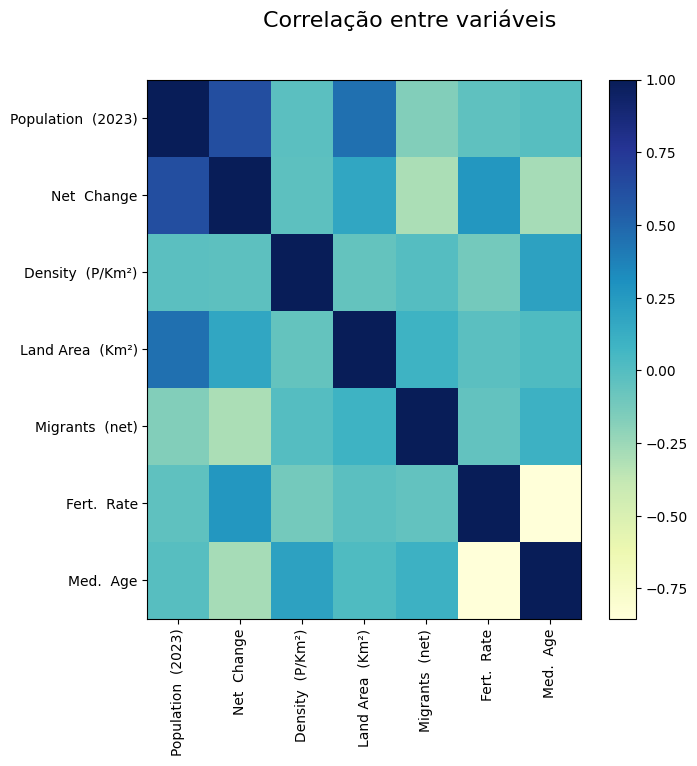

In [5]:
plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre variáveis', fontsize=16)
plt.grid(False)
plt.show()

Através do plot, vemos que as variáveis com correlação mais negativa são `Med. Age` e `Fert. Rate`. Para saber o valor:

In [6]:
var_list = []

for i in corr.columns:
    for j in corr.columns:
        if (i > j):
          var_list.append([i, j, corr[i][j]])

var_ord = sorted(var_list, key=lambda x: x[-1])

print('Variáveis com correlação mais negativa:')
print(f'{var_ord[0][0]} e {var_ord[0][1]}: {var_ord[0][-1]}')

Variáveis com correlação mais negativa:
Med.  Age e Fert.  Rate: -0.8536665517851598


# ***Questão 02***

Mostre a série temporal da variável `Life_Expectancy` para os países: Ireland, Finland, Netherlands, Zambia, Angola. Quais são os países com maior e menor expectativas de vida em 2014?

In [7]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

<ipython-input-8-2b0b03f1a105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = pd.to_datetime(filtered_df['Year'], format='%Y')


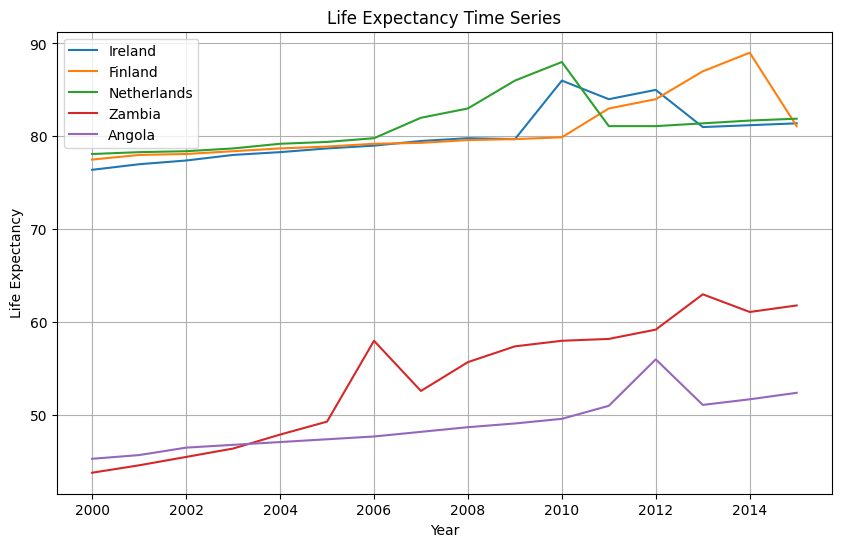

In [8]:
selected_countries = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
filtered_df = df[df['Country'].isin(selected_countries)]

filtered_df['Year'] = pd.to_datetime(filtered_df['Year'], format='%Y')

filtered_df.set_index('Year', inplace=True)

plt.figure(figsize=(10, 6))
for country in selected_countries:
    plt.plot(filtered_df.loc[filtered_df['Country'] == country, 'Life_expectancy'], label=country)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Time Series")
plt.legend()
plt.grid(True)
plt.show()

Em 2014, o país com maior expectativa de vida era a Finlândia, enquanto o país com a menor expectativa de vida era a Angola.

# ***Questão 03***

Leia os dados do seguinte link:

https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a

Construa um gráfico de setores (pizza) para a variável Status. Qual a porcentagem de países desenvolvidos?

In [9]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

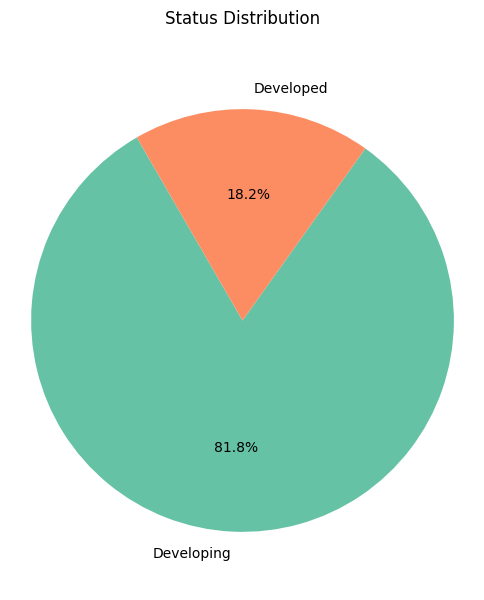

In [10]:
import seaborn as sns

status_counts = df['Status'].value_counts()

plt.figure(figsize=(6,7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('Set2'))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title("Status Distribution", pad='20')

plt.show()

A porcentagem de países desenvolvidos, é, portanto, 18,2%.

# ***Questão 04***

Faça um boxplot para a variável Schooling. Considere os países: 'Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola'. Em termos da mediana, qual deles apresenta maior nível de escolaridade?

In [11]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

In [12]:
selected_countries = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
filtered_data = df[df["Country"].isin(selected_countries)]

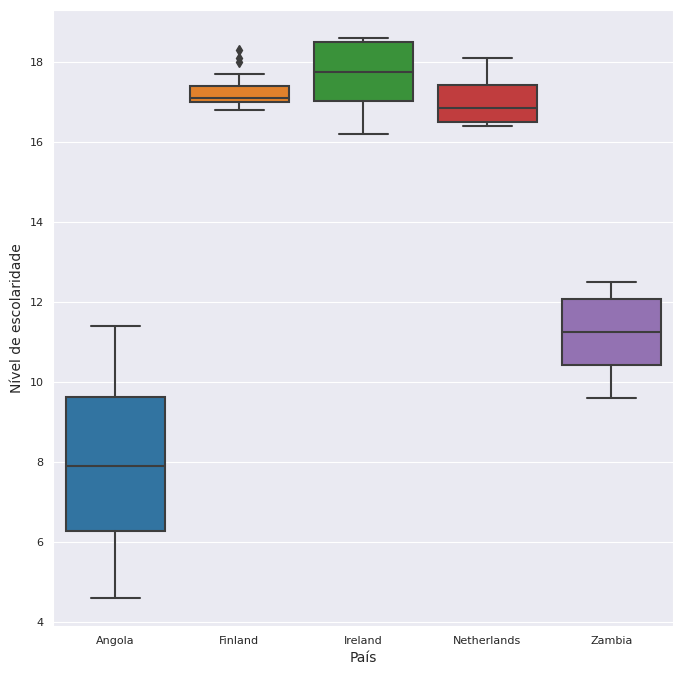

In [13]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 8))

sns.boxplot(x="Country", y='Schooling', data=filtered_data)

plt.xlabel('País', fontsize=10)
plt.ylabel('Nível de escolaridade', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Como podemos ver no boxplot, o país com maior mediana da variável `Schooling` é a Irlanda.

# ***Questão 05***

Considerando a base ainda, construa um histograma para a variável `Life_expectancy`. Qual a média e variância desse atributo?

In [14]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

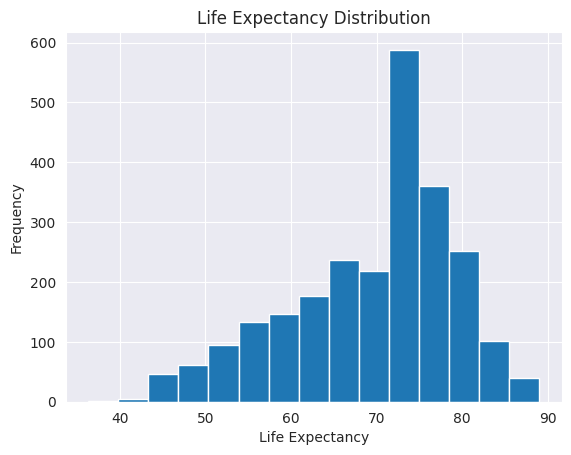

In [15]:
le = df['Life_expectancy']

plt.hist(le, bins=15, edgecolor='white')
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Life Expectancy Distribution")
plt.show()

In [16]:
mean = le.mean()
var = le.var()

print('A média é:', mean.round(1))
print('A variância é:', var.round(1))

A média é: 69.5
A variância é: 92.9


*Nota: As questões compartilham o mesmo dataframe, mas, optei por deixá-las independentes.*